# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

In [2]:
df_bg_tmp = pd.read_csv('../datasets/games_detailed_info.csv')

# Data Cleaning & EDA (Board Games)

In [3]:
df_bg = df_bg_tmp.copy()
df_bg.head()

,Unnamed: 0,type,id,thumbnail,image,primary,alternate,description,yearpublished,minplayers,...,War Game Rank,Customizable Rank,Children's Game Rank,RPG Item Rank,Accessory Rank,Video Game Rank,Amiga Rank,Commodore 64 Rank,Arcade Rank,Atari ST Rank
0,0,boardgame,30549,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,Pandemic,"['EPIZOotic', 'Pandemia', 'Pandemia 10 Anivers...","In Pandemic, several virulent diseases have br...",2008,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,boardgame,822,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,Carcassonne,"['Carcassonne Jubilee Edition', 'Carcassonne: ...",Carcassonne is a tile-placement game in which ...,2000,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,boardgame,13,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...,Catan,"['CATAN', 'Catan (Колонизаторы)', 'Catan telep...","In CATAN (formerly The Settlers of Catan), pla...",1995,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,boardgame,68448,https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...,https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...,7 Wonders,"['7 csoda', '7 Cudów Świata', '7 divů světa', ...",You are the leader of one of the 7 great citie...,2010,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,boardgame,36218,https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...,https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...,Dominion,"['Dominion: Basisspiel', 'Dominion: In naam va...","&quot;You are a monarch, like your parents bef...",2008,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print('MISSING VALUES IN DATASET:')
print(df_bg.isna().sum().sort_values(ascending=False))

MISSING VALUES IN DATASET:
Atari ST Rank                    21630
Video Game Rank                  21630
Arcade Rank                      21630
Commodore 64 Rank                21630
RPG Item Rank                    21630
Accessory Rank                   21630
Amiga Rank                       21630
Customizable Rank                21330
Party Game Rank                  20984
boardgamecompilation             20804
Children's Game Rank             20755
Abstract Game Rank               20522
Thematic Rank                    20396
boardgameintegration             19900
Family Game Rank                 19304
Strategy Game Rank               19294
War Game Rank                    18130
boardgameimplementation          16769
boardgameexpansion               16125
alternate                        12781
boardgameartist                   5907
boardgamefamily                   3761
boardgamemechanic                 1590
boardgamedesigner                  596
boardgamecategory                  28

เนื่องจากมีหลาย features ที่มี null ปริมาณมาก จึงทำการตัด feature ที่มี **null มากกว่า 50%**

In [5]:
df_bg = df_bg.dropna(axis=1,thresh=11000)
print('MISSING VALUES IN DATASET:')
print(df_bg.isna().sum().sort_values(ascending=False))

MISSING VALUES IN DATASET:
boardgameartist                  5907
boardgamefamily                  3761
boardgamemechanic                1590
boardgamedesigner                 596
boardgamecategory                 283
suggested_playerage               111
suggested_language_dependence      72
thumbnail                          15
image                              15
description                         1
boardgamepublisher                  1
usersrated                          0
owned                               0
median                              0
wishing                             0
Board Game Rank                     0
bayesaverage                        0
numcomments                         0
average                             0
trading                             0
wanting                             0
numweights                          0
stddev                              0
Unnamed: 0                          0
type                                0
minage                 

เปลี่ยนชื่อ features ให้เข้าใจง่ายและคัดเลือกเฉพาะ features ที่น่านำมาวิเคราะห์

In [6]:
df_bg['type'].value_counts()

boardgame    21631
Name: type, dtype: int64

ทุกเกมเป็น `type` เดียวกันหมด จึงตัดทิ้ง

In [7]:
df_bg.rename(index=str, 
             columns={"primary": "name", "boardgamecategory": "category", "averageweight" : "weight", 
                      "Board Game Rank": "rank", "bayesaverage": "geek_rating", "average": "avg_rating","boardgamemechanic":"mechanic",
                      "boardgameartist": "artist", "boardgamedesigner":"designer", "boardgamepublisher": "publisher"}, inplace=True)

df_bg = df_bg[['id', 'name', 'rank', 'geek_rating', 'avg_rating', 'usersrated', 
               'category','mechanic', 'weight', 'minplayers', 'maxplayers', 
               'playingtime', 'minage',  'owned', 'yearpublished', 'designer', 
               'artist', 'publisher', 'description', 'image']]
df_bg.columns

Index(['id', 'name', 'rank', 'geek_rating', 'avg_rating', 'usersrated',
       'category', 'mechanic', 'weight', 'minplayers', 'maxplayers',
       'playingtime', 'minage', 'owned', 'yearpublished', 'designer', 'artist',
       'publisher', 'description', 'image'],
      dtype='object')

ตัดข้อมูลที่ `name` ซ้ำกัน

In [8]:
print(df_bg['name'].value_counts())
df_bg = df_bg.drop_duplicates(subset=['name'])
df_bg.shape

Robin Hood                              6
Chaos                                   4
Warhammer 40,000: Kill Team             4
Saga                                    4
Cosmic Encounter                        4
                                       ..
Batman: Arkham City Escape              1
Amber                                   1
Federation Commander: Romulan Border    1
Seven Bridges                           1
Green Beret: Vietnam                    1
Name: name, Length: 21236, dtype: int64


(21236, 20)

พิจารณา `usersrated` และ `rank`

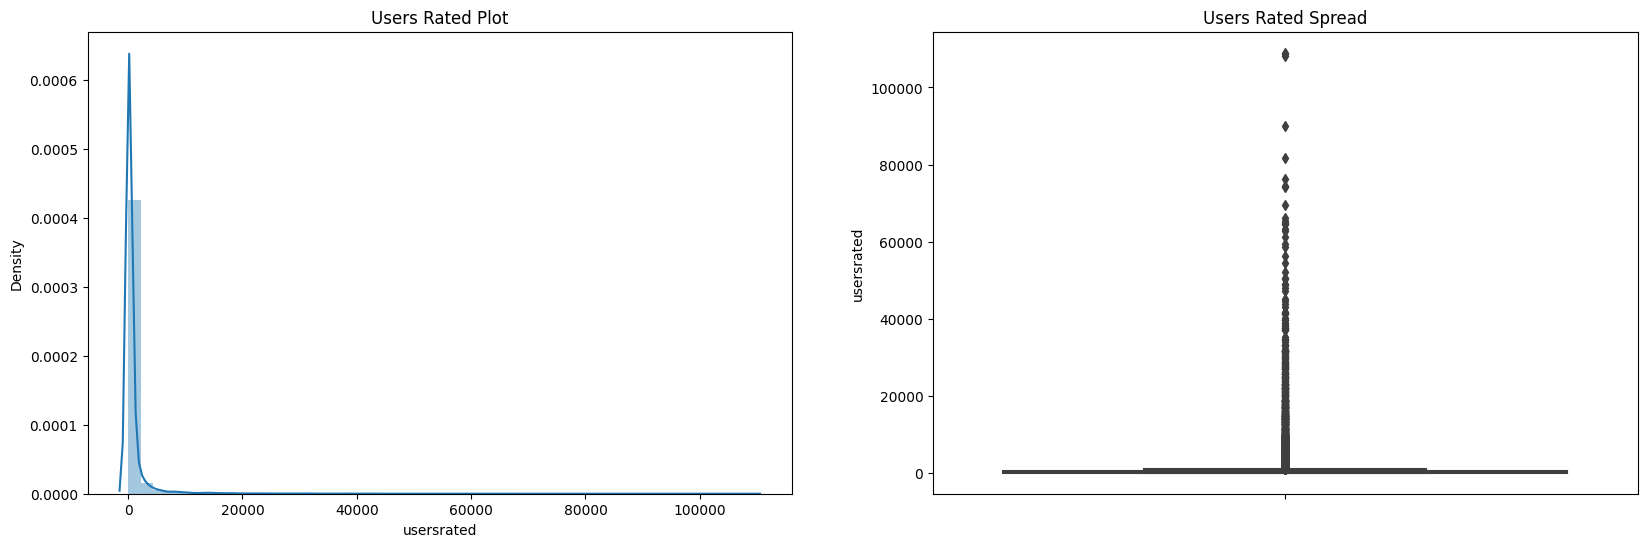

In [9]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Users Rated Plot')
sns.distplot(df_bg['usersrated'])

plt.subplot(1,2,2)
plt.title('Users Rated Spread')
sns.boxplot(y=df_bg['usersrated'])

plt.show()

In [10]:
df_bg['usersrated'].describe([0.25, 0.5, 0.6, 0.7, 0.75, 0.8])

count     21236.000000
mean        886.800480
std        3729.543755
min          29.000000
25%          57.000000
50%         125.000000
60%         186.000000
70%         297.000000
75%         403.000000
80%         571.000000
max      109006.000000
Name: usersrated, dtype: float64

1. กราฟที่ได้เป็น Right skewed distributions
1. เกม 70% ที่มี `usersrated` ต่ำกว่า 300

ทำการตัดข้อมูลที่มี `usersrated` ต่ำกว่า 300

In [11]:
df_bg = df_bg[df_bg['usersrated'] >= 300]
df_bg['usersrated'].describe()

count      6345.000000
mean       2730.857683
std        6457.333390
min         300.000000
25%         479.000000
50%         862.000000
75%        2114.000000
max      109006.000000
Name: usersrated, dtype: float64

คัดเฉพาะเกมที่ `rank` ไม่เกิน 6000 (เกมที่แรงค์ต่ำเกินไปอาจเป็นเกมออกใหม่หรือไม่เป็นที่นิยม ซึ่งสามารถหาเล่นได้ยาก)

In [12]:
df_bg = df_bg[df_bg['rank'] != 'Not Ranked'] 
df_bg = df_bg.astype({'rank': int}, errors='raise')

df_bg = df_bg[df_bg['rank'] <= 6000].copy()
df_bg.shape

(5121, 20)

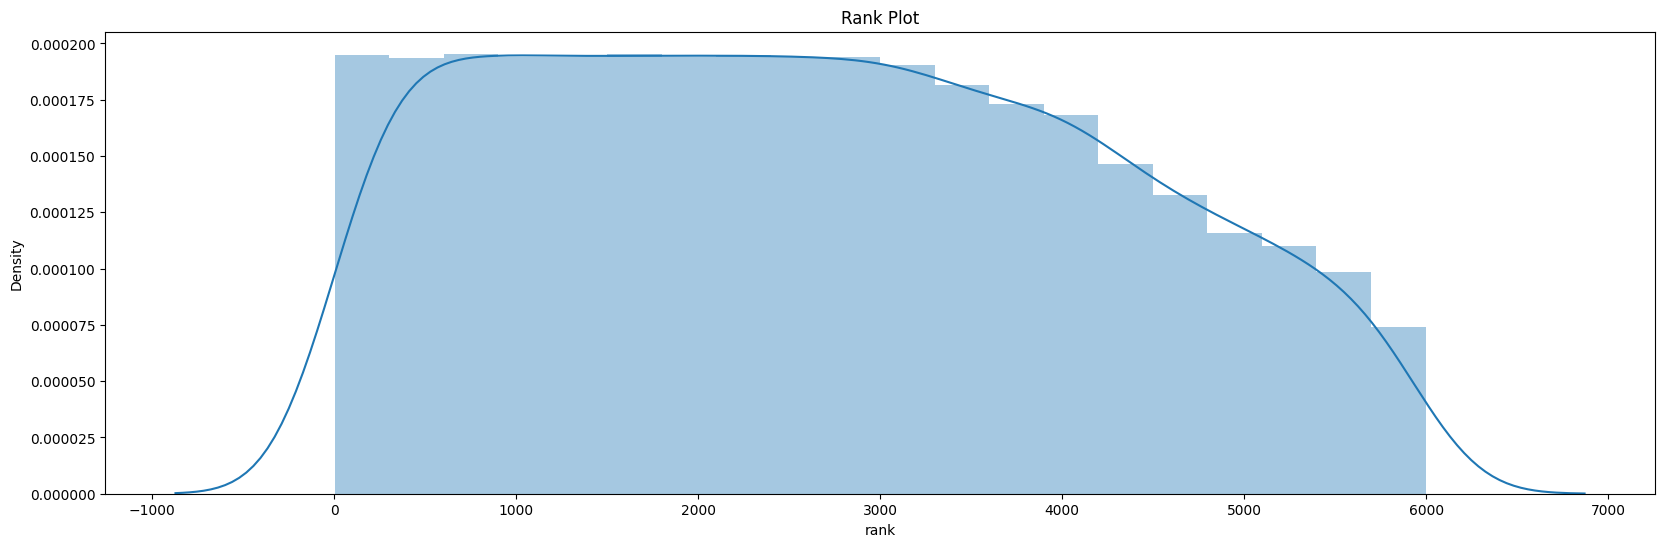

In [13]:
plt.figure(figsize=(20,6))
plt.title('Rank Plot')
sns.distplot(df_bg['rank'])
plt.show()

ข้อมูลที่ถูกตัดจาก`usersrated` มีเพียงเกมที่ `rank` มากกว่า 3000 เนื่องจากระบบ ranking ของ **BoardGameGeek** จัดตาม **Geek Rating** ซึ่งมีการใช้ dummy votes สำหรับเกมที่มีจำนวนคนให้คะแนนน้อย

ส่งผลให้เกมที่แม้จะได้คะแนนเยอะแต่มีจำนวนคนให้คะแนนน้อยมีแนวโน้มที่ **Geek Rating** น้อยกว่าเกมที่ได้คะแนนน้อยกว่าแต่มีจำนวนคนให้คะแนนเยอะ

ตัดข้อมูลที่ `category` หรือ `mechanic` เป็น null

In [14]:
df_bg = df_bg[df_bg['category'] == df_bg['category']]
df_bg = df_bg[df_bg['mechanic'] == df_bg['mechanic']] 
df_bg.shape

(4998, 20)

แทนที่ `artist` และ `designer` ที่เป็น null ให้เป็น `unknown`

In [15]:
df_bg['artist'] = df_bg['artist'].fillna("'unknown'")
df_bg['designer'] = df_bg['designer'].fillna("'unknown'")

**Numerical Data**
* rank
* geek_rating
* avg_rating
* usersrated
* weight
* minplayers
* maxplayers
* playingtime
* minage
* owned
* yearpublished


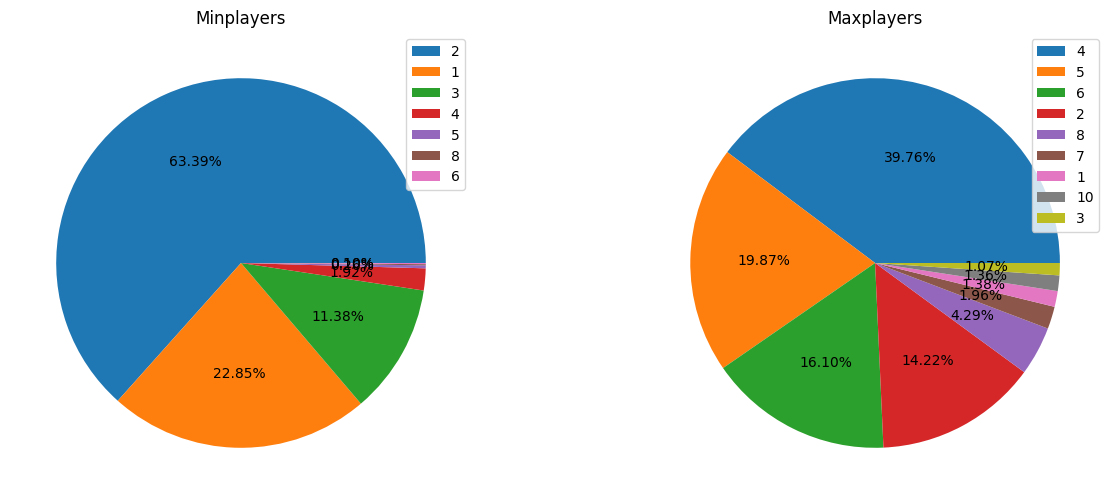

In [16]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Minplayers')
plt.pie(df_bg['minplayers'].value_counts(), autopct='%.2f%%')
plt.legend(df_bg['minplayers'].value_counts().index)

vc = df_bg['maxplayers'].value_counts()
vc = vc[vc > 50]
plt.subplot(1,2,2)
plt.title('Maxplayers')
plt.pie(vc, autopct='%.2f%%')
plt.legend(vc.index)
plt.show()

1. เกมส่วนใหญ่ต้องมี `minplayers` อย่างน้อย 2 คน (63.39%)
1. เกมส่วนใหญ่ออกแบบมาสำหรับ `maxplayers` 4 คน (39.76%)
1. เกมที่**ออกแบบมาสำหรับเล่นคนเดียว** (`maxplayers = 1`) มีน้อยมาก (1.38%) แต่เนื่องจากบางเกมมีกฏพิเศษสำหรับการเล่นคนเดียวทำให้เกมที่**สามารถเล่นคนเดียวได้** (`minplayers = 1`) มีมากพอสมควร (22.85%)

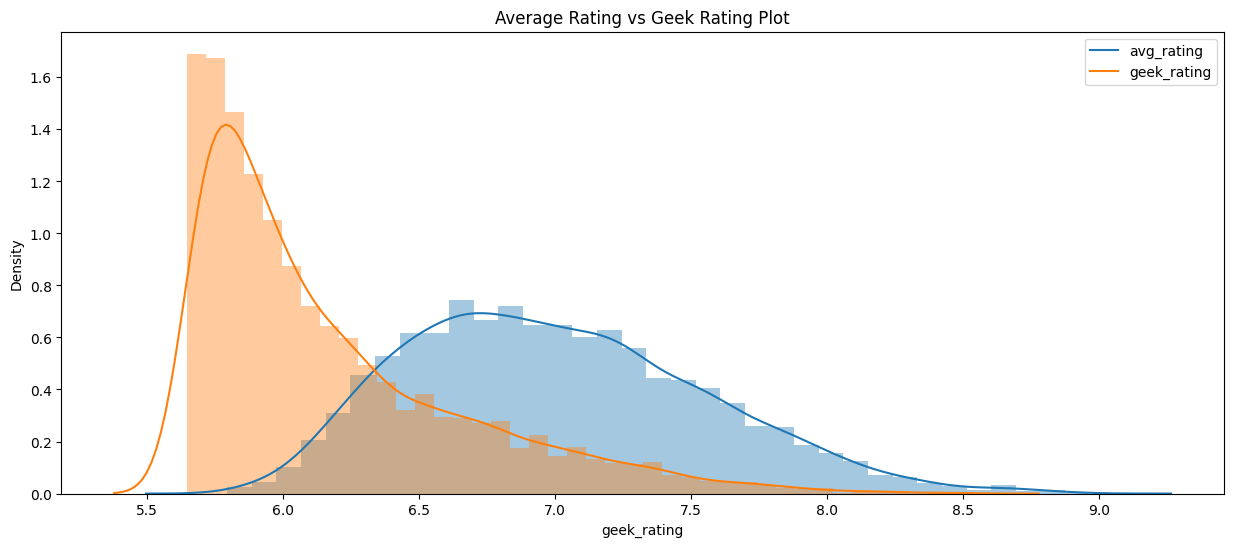

In [17]:
plt.figure(figsize=(15,6))
plt.title('Average Rating vs Geek Rating Plot')
sns.distplot(df_bg['avg_rating'])

sns.distplot(df_bg['geek_rating'])
plt.legend(['avg_rating', 'geek_rating'])
plt.show()

1. `avg_rating` เป็น normal distribution โดยมีค่าเฉลี่ยอยู่ที่ 7
1. `geek_rating` เป็น right skewed distribution เนื่องจากมีการดึงให้คะแนนอยู่ที่ 5.5
1. โดยเฉลี่ย `avg_rating` จะมากกว่า `geek_rating`

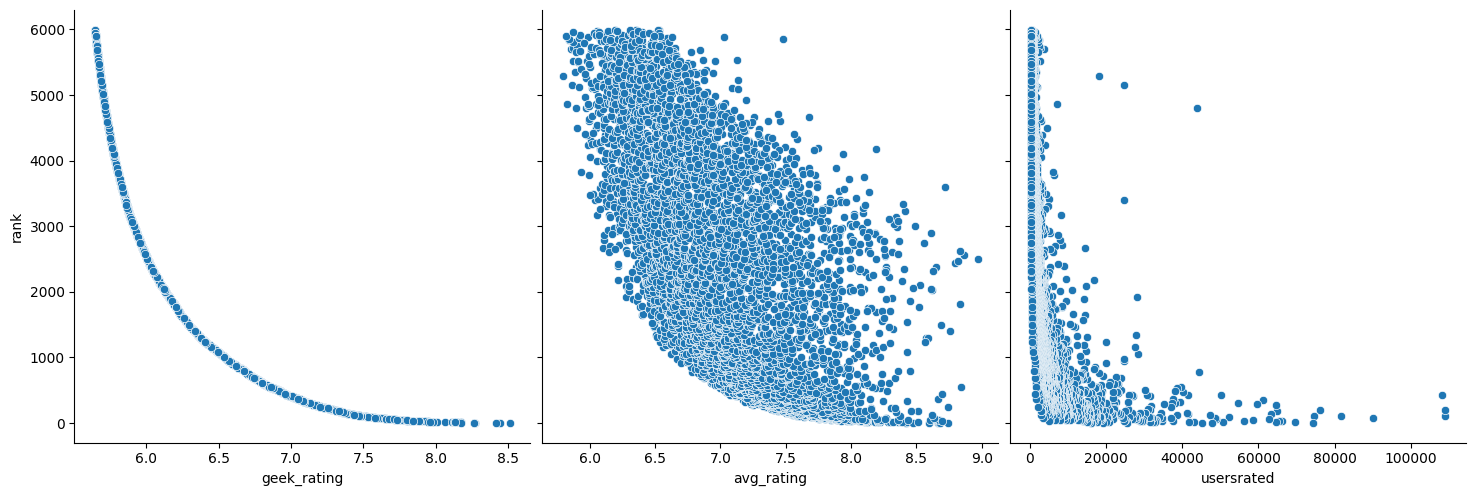

In [18]:
sns.pairplot(df_bg, x_vars=['geek_rating', 'avg_rating', 'usersrated'], y_vars='rank',size=5, aspect=1, kind='scatter')
plt.show()

1. `rank` จะแปรผกผันตาม `geek_rating`, `avg_rating` และ `usersrated`
1. `geek_rating` จะส่งผลต่อ `rank` โดยตรง

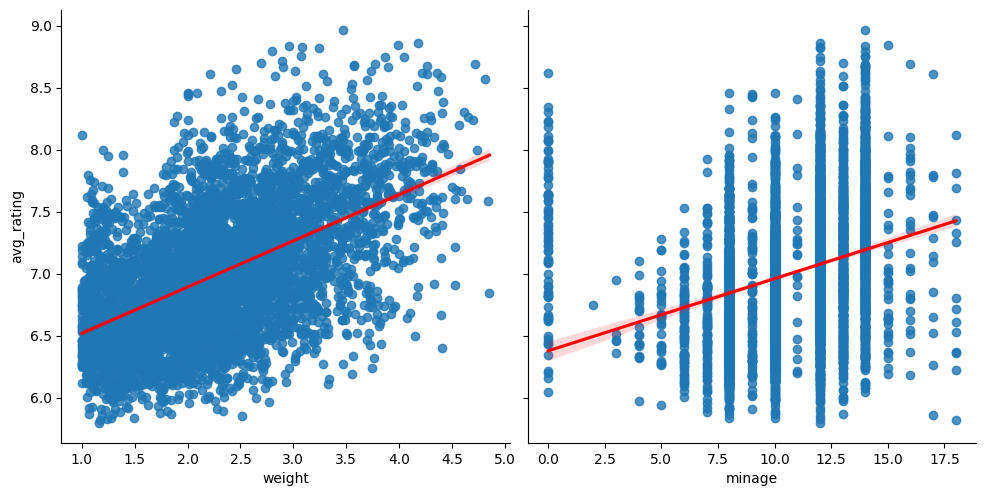

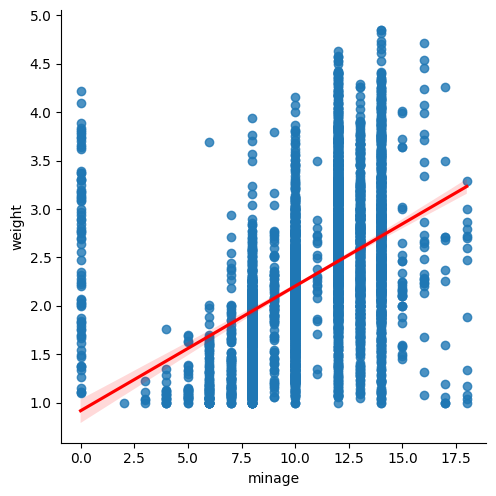

In [19]:
sns.pairplot(df_bg, x_vars=['weight','minage'], y_vars='avg_rating',size=5, aspect=1, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

sns.pairplot(df_bg, x_vars=['minage'], y_vars='weight',size=5, aspect=1, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

1. เกมที่ `weight`, `minage` เยอะจะมีแนวโน้มที่จะได้ `avg_rating` สูง
1. เกมที่ `weight` เยอะจะออกแบบมาสำหรับผู้เล่นที่ `minage` เยอะ

ge` เยอะ

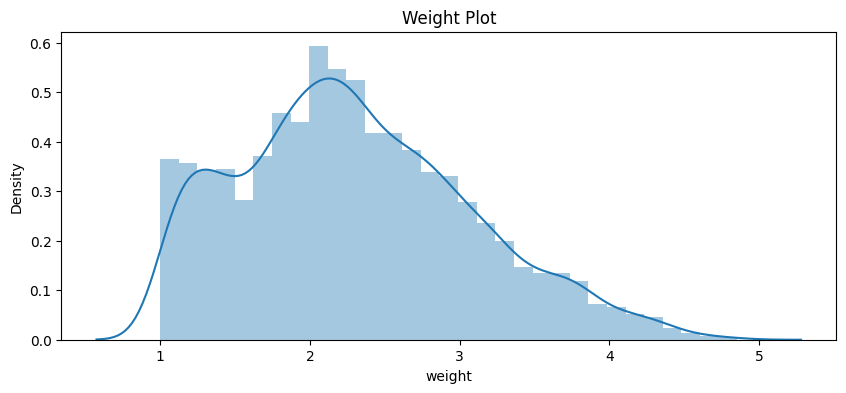

In [20]:
plt.figure(figsize=(10,4))
plt.title('Weight Plot')
sns.distplot(df_bg['weight'])
plt.show()

เกมส่วนใหญ่มี `weight` อยู่ที่ 2.0 - 2.5

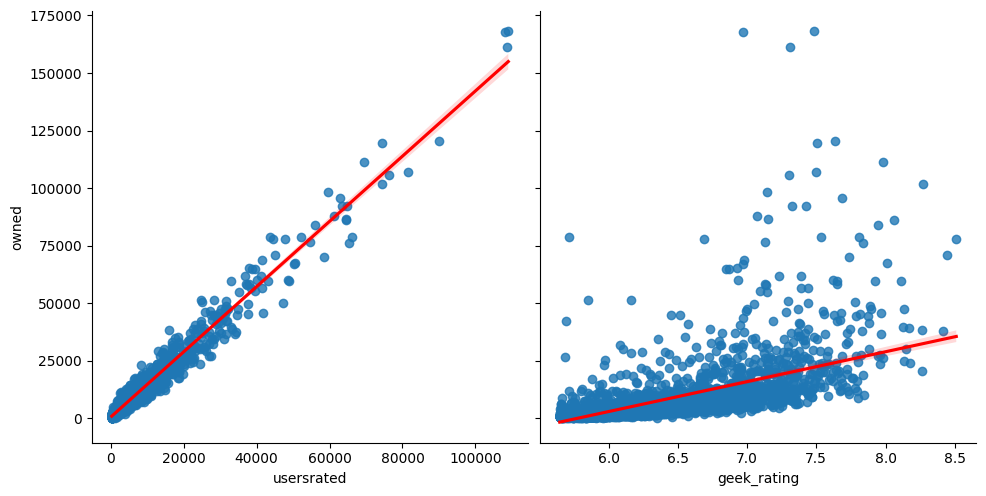

In [21]:
sns.pairplot(df_bg, x_vars=['usersrated', 'geek_rating'], y_vars='owned',size=5, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

เกมที่มี `owned` เยอะจะมี `userstared` เยอะ และมีแนวโน้มที่จะได้ `geek_rating` มากขึ้นเล็กน้อย

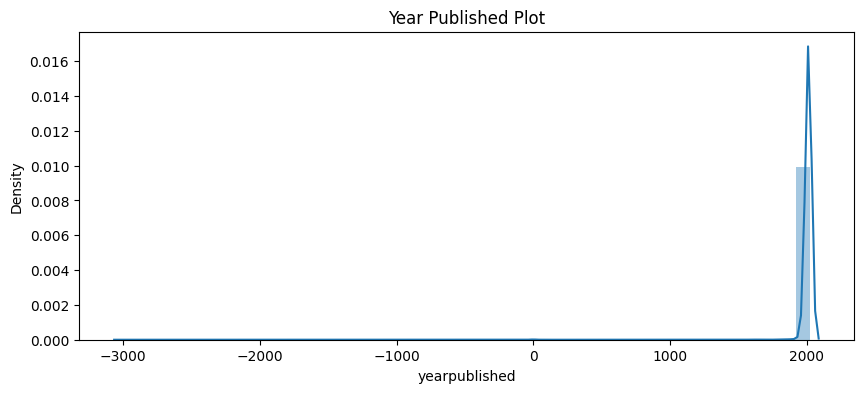

In [22]:
plt.figure(figsize=(10,4))
plt.title('Year Published Plot')
sns.distplot(df_bg['yearpublished'])
plt.show()

In [23]:
old_game = df_bg.loc[df_bg['yearpublished']<=0]
old_game.head()

,id,name,rank,geek_rating,avg_rating,usersrated,category,mechanic,weight,minplayers,maxplayers,playingtime,minage,owned,yearpublished,designer,artist,publisher,description,image
208,188,Go,186,7.31782,7.63588,15516,['Abstract Strategy'],"['Enclosure', 'Point to Point Movement', 'Squa...",3.9422,2,2,180,8,21439,-2200,['(Uncredited)'],"['(Uncredited)', 'Barbro Hennius', 'Norman Som...","['(Public Domain)', '(Self-Published)', '(Unkn...","By all appearances, it's just two players taki...",https://cf.geekdo-images.com/6qAiZwWxSSKP2kFcA...
296,2397,Backgammon,1332,6.36154,6.54443,12303,"['Abstract Strategy', 'Dice']","['Advantage Token', 'Betting and Bluffing', 'D...",2.0182,2,2,30,8,18889,-3000,['(Uncredited)'],"['(Uncredited)', 'Willem Cornelisz Duyster', '...","['(Public Domain)', '(Unknown)', '3M', 'ABRA',...",Backgammon is a classic abstract strategy game...,https://cf.geekdo-images.com/_6HVCuGni6NunlrSj...
1950,5072,Carrom,1580,6.26595,7.05447,1674,['Action / Dexterity'],"['Flicking', 'Team-Based Game']",1.4603,2,4,60,6,1873,0,['(Uncredited)'],'unknown',"['(Public Domain)', '(Unknown)', 'ABRA', 'ASS ...",Carrom is most easily described as &quot;finge...,https://cf.geekdo-images.com/vR9qsSxUGlmEydBU7...
2005,30618,Eat Poop You Cat,1147,6.45754,7.45018,1625,"['Humor', 'Party Game']",['Paper-and-Pencil'],1.1111,3,99,20,0,810,0,['(Uncredited)'],'unknown',['(Public Domain)'],Each player starts with a piece of paper and a...,https://cf.geekdo-images.com/XMkoh0Iwise1NlrwQ...
4954,11865,Koi-Koi,4828,5.71417,6.63866,455,['Card Game'],"['Hand Management', 'Push Your Luck', 'Set Col...",1.6875,2,4,30,0,447,0,['(Uncredited)'],'unknown',"['(Public Domain)', 'JuegosdeMesa.com.ar', 'Wa...",A traditional two-player Japanese card game pl...,https://cf.geekdo-images.com/JYZ21Y7RrYdCA9bo0...


เกมเหล่านี้ส่วนใหญ่เป็นบอร์ดเกมแบบดั้งเดิมที่ล้าสมัยซึ่งเราจะไม่แนะนำบอร์ดเกมดังกล่าว จึงทำการกรองเกมที่ `yearpublished` เก่ากว่า **1995** ทิ้ง 
เนื่องจากเป็นปีที่**มี Eurogames เกมแรกได้รับความนิยมนอกยุโรป (Catan)**

In [24]:
df_bg = df_bg.loc[df_bg['yearpublished']>=1995]
df_bg.shape

(4582, 20)

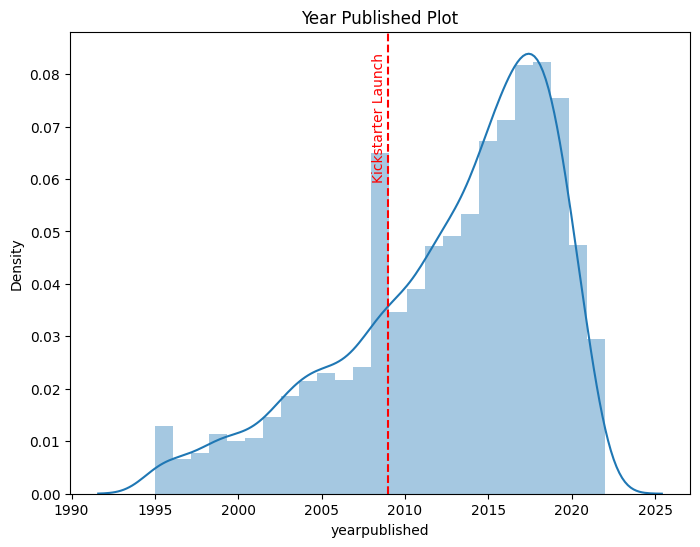

In [25]:
plt.figure(figsize=(8,6))
plt.title('Year Published Plot')
sns.distplot(df_bg['yearpublished'])
plt.axvline(2009, ls='--', c='r')
plt.text(2008, 0.06, 'Kickstarter Launch', rotation='vertical', c='r');
plt.show()

อัตราการพัฒนาบอร์ดเกมสูงขึ้นเรื่อย ๆ โดยเฉพาะตั้งแต่ปี **2009** ซึ่งเป็นปีที่ **Kickstarter(บริษัทระดมทุน)เปิดตัว**

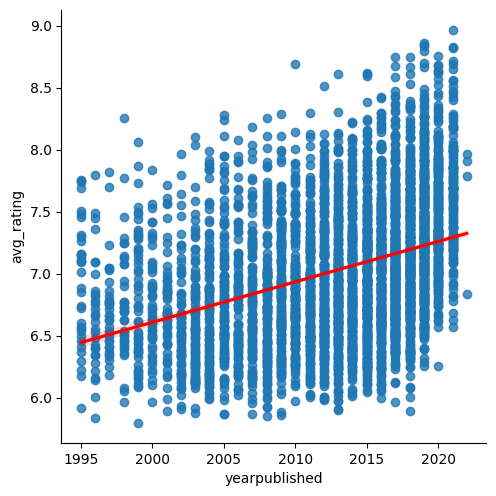

In [26]:
sns.pairplot(df_bg, x_vars='yearpublished', y_vars='avg_rating',size=5, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

เกมที่ `yearpublished` ใหม่จะมีแนวโน้มที่ได้ `avg_rating` เยอะ (อาจเป็นเพราะจำนวนคนให้คะแนนน้อยทำให้เกิด bias)

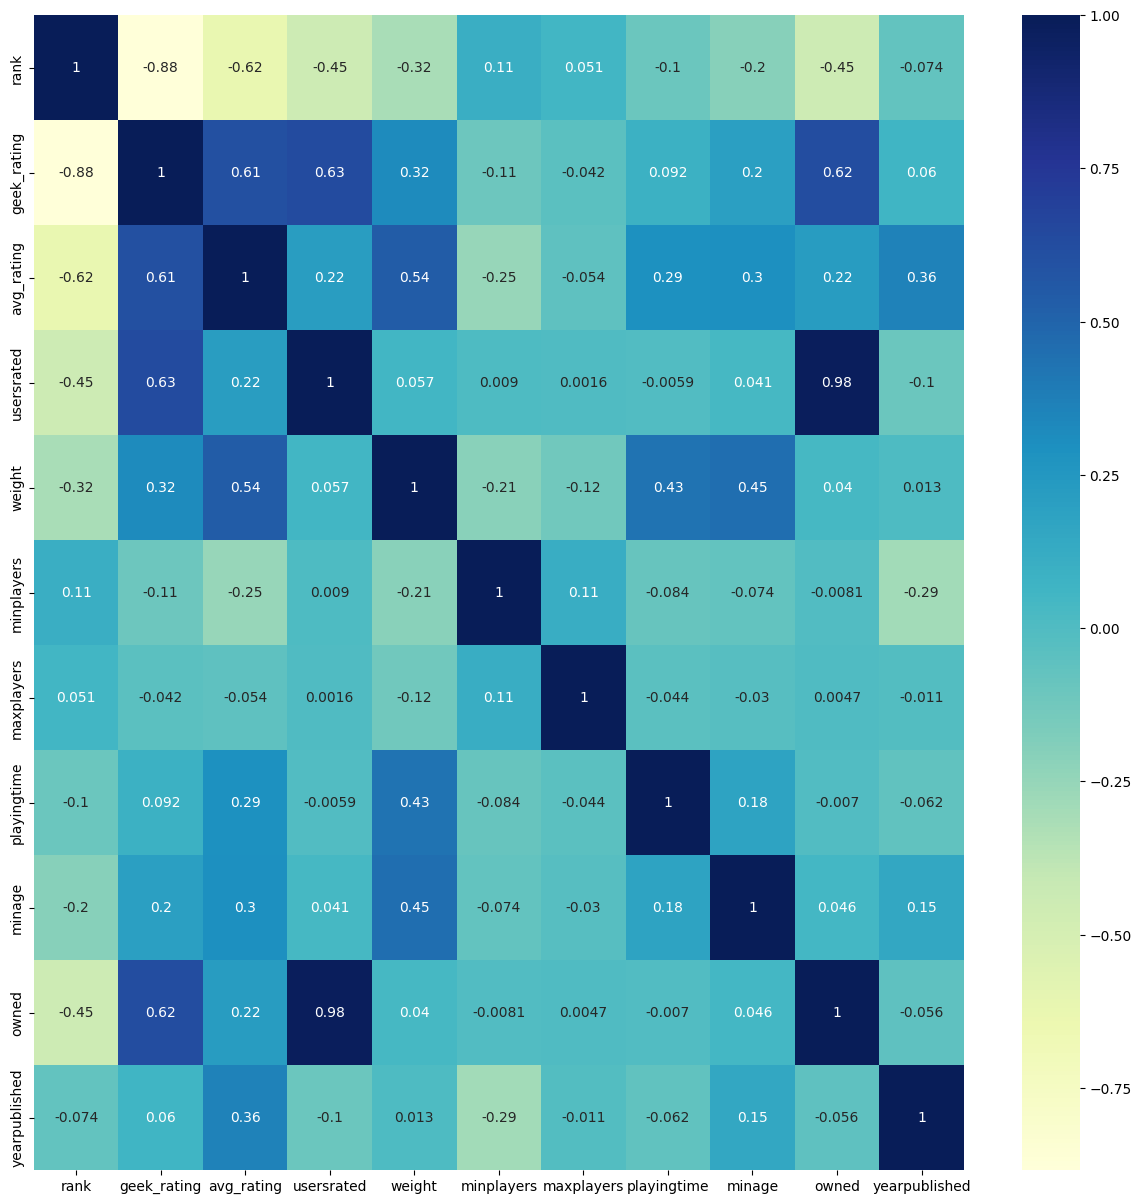

In [27]:
df_bg_num = df_bg[['rank', 'geek_rating', 'avg_rating', 'usersrated', 'weight', 'minplayers', 'maxplayers',
                   'playingtime', 'minage', 'owned' ,'yearpublished']].copy()

plt.figure(figsize = (15, 15))
sns.heatmap(df_bg_num.corr(), annot = True, cmap="YlGnBu")
plt.show()

1. `rank` ถูกจัดอันดับตาม `geek_rating` ทำให้มีความสัมพันธ์กันโดยตรง
1. `usersrated` และ `owned` มีความใกล้เคียงกันมาก สามารถใช้แทนกันได้ (ตัด `owned` ทิ้ง)
1. `geek_rating` จะขึ้นอยู่กับ `avg_rating`, `usersrated` และ `weight`
1. เกมที่ `weight` สูงจะถูกออกแบบให้ `minage` เยอะและต้องใช้ `playingtime` เยอะ
1. `yearpublished` ที่ใหม่จะมีแนวโน้มที่ได้ `avg_rating` สูง 

In [28]:
df_bg = df_bg.drop(columns=['owned'])
df_bg.head()

,id,name,rank,geek_rating,avg_rating,usersrated,category,mechanic,weight,minplayers,maxplayers,playingtime,minage,yearpublished,designer,artist,publisher,description,image
0,30549,Pandemic,106,7.48669,7.58896,109006,['Medical'],"['Action Points', 'Cooperative Game', 'Hand Ma...",2.4063,2,4,45,8,2008,['Matt Leacock'],"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...","['Z-Man Games', 'Albi', 'Asmodee', 'Asmodee It...","In Pandemic, several virulent diseases have br...",https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...
1,822,Carcassonne,191,7.30857,7.41837,108776,"['City Building', 'Medieval', 'Territory Build...","['Area Majority / Influence', 'Map Addition', ...",1.9057,2,5,45,7,2000,['Klaus-Jürgen Wrede'],"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",Carcassonne is a tile-placement game in which ...,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...
2,13,Catan,429,6.96965,7.13598,108064,"['Economic', 'Negotiation']","['Dice Rolling', 'Hexagon Grid', 'Income', 'Mo...",2.3130,3,4,120,10,1995,['Klaus Teuber'],"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...","['KOSMOS', '999 Games', 'Albi', 'Asmodee', 'As...","In CATAN (formerly The Settlers of Catan), pla...",https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...
3,68448,7 Wonders,73,7.63355,7.73515,90021,"['Ancient', 'Card Game', 'City Building', 'Civ...","['Drafting', 'Hand Management', 'Set Collectio...",2.3264,2,7,30,10,2010,['Antoine Bauza'],"['Dimitri Chappuis', 'Miguel Coimbra', 'Etienn...","['Repos Production', 'ADC Blackfire Entertainm...",You are the leader of one of the 7 great citie...,https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...
4,36218,Dominion,104,7.49912,7.61000,81582,"['Card Game', 'Medieval']","['Deck, Bag, and Pool Building', 'Delayed Purc...",2.3542,2,4,30,13,2008,['Donald X. Vaccarino'],"['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Rio Grande Games', '999 Games', 'Albi', 'Bar...","&quot;You are a monarch, like your parents bef...",https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...


**Categorical Data**
* category 
* mechanic 
* designer
* artist
* publisher

In [29]:
df_bg['publisher'] = df_bg['publisher'].replace(', Ltd.','Ltd.', regex=True)
df_bg_cat = df_bg[['category', 'mechanic', 'designer', 'artist', 'publisher']].copy()

for col in df_bg_cat.columns:
    df_bg_cat[col] = df_bg_cat[col].apply(lambda x: x[1:len(x)-1].split(', '))

df_bg_cat.head()

,category,mechanic,designer,artist,publisher
0,['Medical'],"['Action Points', 'Cooperative Game', 'Hand Ma...",['Matt Leacock'],"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...","['Z-Man Games', 'Albi', 'Asmodee', 'Asmodee It..."
1,"['City Building', 'Medieval', 'Territory Build...","['Area Majority / Influence', 'Map Addition', ...",['Klaus-Jürgen Wrede'],"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['Hans im Glück', '999 Games', 'Albi', 'Bard C..."
2,"['Economic', 'Negotiation']","['Dice Rolling', 'Hexagon Grid', 'Income', 'Mo...",['Klaus Teuber'],"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...","['KOSMOS', '999 Games', 'Albi', 'Asmodee', 'As..."
3,"['Ancient', 'Card Game', 'City Building', 'Civ...","['Drafting', 'Hand Management', 'Set Collectio...",['Antoine Bauza'],"['Dimitri Chappuis', 'Miguel Coimbra', 'Etienn...","['Repos Production', 'ADC Blackfire Entertainm..."
4,"['Card Game', 'Medieval']","['Deck, Bag, and Pool Building', 'Delayed Purc...",['Donald X. Vaccarino'],"['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Rio Grande Games', '999 Games', 'Albi', 'Bar..."


In [30]:
df_rating = df_bg[['geek_rating', 'avg_rating']].copy()
df_rating.head()

,geek_rating,avg_rating
0,7.48669,7.58896
1,7.30857,7.41837
2,6.96965,7.13598
3,7.63355,7.73515
4,7.49912,7.61000


**Categories**

In [31]:
cats_dummy = df_bg['category'].str.strip('[]').copy()
cats_dummy = cats_dummy.str.replace(" ", '')

cats_dummy = pd.concat([cats_dummy.str.get_dummies(sep=",")])

cats_rating = df_rating.join(cats_dummy, how='left')
cats_rating.head()

,geek_rating,avg_rating,"""Children'sGame""",'AbstractStrategy','Action/Dexterity','Adventure','AgeofReason','AmericanCivilWar','AmericanIndianWars','AmericanRevolutionaryWar',...,'Transportation','Travel','Trivia','VideoGameTheme','VietnamWar','Wargame','WordGame','WorldWarI','WorldWarII','Zombies'
0,7.48669,7.58896,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.30857,7.41837,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.96965,7.13598,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.63355,7.73515,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.49912,7.61000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Make data frame of sum of all categories
df_cats = pd.DataFrame(cats_dummy.sum())
# make data frame of all categories with sum over the minimum
cats_top = df_cats.loc[df_cats[0] > 250]
# make a list of the included mechanics
cats_list = list(cats_top.index)

cats_top = cats_top.sort_values(0, ascending=False)
cats_top

,0
'CardGame',1419
'Fantasy',861
'Economic',563
'Fighting',532
'ScienceFiction',462
'Wargame',425
'Dice',416
'Adventure',359
'Miniatures',352
'Medieval',337


In [33]:
# make a dictionary to store our next part
cats_rating_dict = {}

# for each included category
for cat in cats_list:
    # get the average rating of all games that have that category
    geek_rating = cats_rating.loc[cats_rating[cat]==1]['geek_rating'].mean()
    avg_rating = cats_rating.loc[cats_rating[cat]==1]['avg_rating'].mean()
    # store the average rating in the dictionary
    cats_rating_dict[cat] = [round(geek_rating, 3), round(avg_rating, 3)]
    
# make a dataframe of the categories sorted by rating
cats_geek_rating = pd.DataFrame.from_dict(cats_rating_dict, orient='index', columns=['geek_rating', 'avg_rating']).sort_values('geek_rating', ascending=False)
cats_avg_rating = pd.DataFrame.from_dict(cats_rating_dict, orient='index', columns=['geek_rating', 'avg_rating']).sort_values('avg_rating', ascending=False)

cats_geek_rating

,geek_rating,avg_rating
'Economic',6.390,7.183
'CityBuilding',6.342,7.060
'Adventure',6.309,7.212
'Medieval',6.308,7.076
'Exploration',6.300,7.147
'Miniatures',6.286,7.433
'Fighting',6.283,7.177
'ScienceFiction',6.281,7.183
'Fantasy',6.232,7.163
'Wargame',6.199,7.434


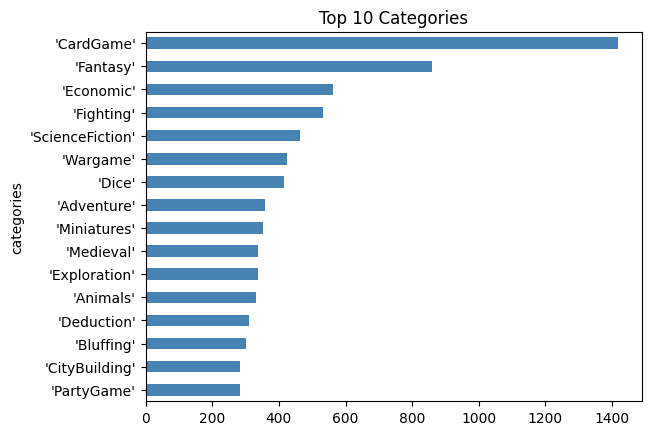

In [34]:
cats_top.plot(kind='barh', color='steelblue', legend=None)
plt.gca().invert_yaxis()
plt.title('Top 10 Categories', fontsize=12)
plt.ylabel('categories')
plt.show()

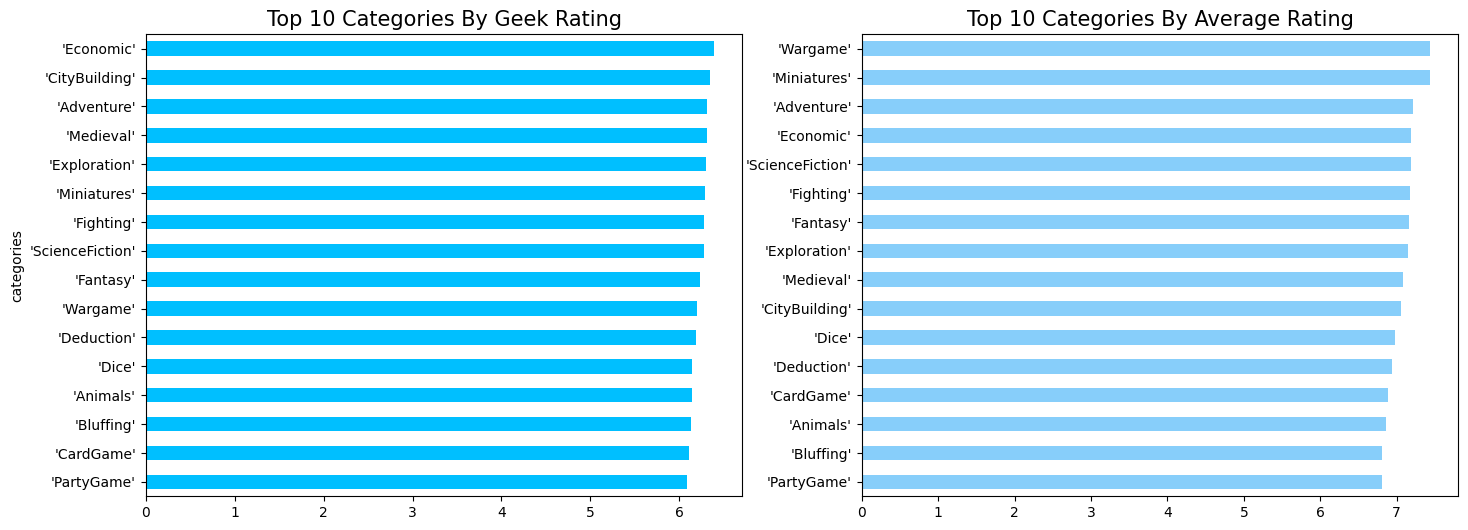

In [35]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.subplots_adjust(right=1)
cats_geek_rating['geek_rating'].plot(kind='barh', color='deepskyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Categories By Geek Rating', fontsize=15)
plt.ylabel('categories')

plt.subplot(1,2,2)
cats_avg_rating['avg_rating'].plot(kind='barh', color='lightskyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Categories By Average Rating', fontsize=15)
plt.show()

1. `category` ที่พบมากที่สุดคือ `Card Game` และ `Fantasy`
1. `Economic`, `Adventure`, `Fighting` ได้คะแนนสูงจากทั้ง `geek_rating` และ `avg_raing` นอกจากนี้ยังเป็นหมวดหมู่ที่ถูกพัฒนาออกมาหลายเกม
1. `Card Game` ถูกพัฒนาออกมามากที่สุดแต่คะแนนไม่ได้สูงมาก

**Mechanics**

In [36]:
mechs_dummy = df_bg['mechanic'].str.strip('[]').copy()
mechs_dummy = mechs_dummy.str.replace(" ", '')
mechs_dummy = mechs_dummy.str.replace("'", '')

mechs_dummy = pd.concat([mechs_dummy.str.get_dummies(sep=",")])

mechs_rating = df_rating.join(mechs_dummy, how='left')
mechs_rating.head()

,geek_rating,avg_rating,"""PrisonersDilemma""",Acting,Action/Event,ActionDrafting,ActionPoints,ActionQueue,ActionRetrieval,ActionTimer,...,VariablePhaseOrder,VariablePlayerPowers,VariableSet-up,VictoryPointsasaResource,Voting,WorkerPlacement,WorkerPlacementwithDiceWorkers,YouChoose,ZoneofControl,andPoolBuilding
0,7.48669,7.58896,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,7.30857,7.41837,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.96965,7.13598,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,7.63355,7.73515,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,7.49912,7.61000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [37]:
df_mechs = pd.DataFrame(mechs_dummy.sum())
mechs_top = df_mechs.loc[df_mechs[0]>350]
mechs_list = list(mechs_top.index)

mechs_top = mechs_top.sort_values(0, ascending=False)
mechs_top

,0
HandManagement,1486
DiceRolling,1339
VariablePlayerPowers,1062
SetCollection,947
CardDrafting,756
AreaMajority/Influence,688
ModularBoard,607
TilePlacement,604
CooperativeGame,579
Solo/SolitaireGame,482


In [38]:
mechs_rating_dict = {}

for mech in mechs_list:
    geek_rating = mechs_rating.loc[mechs_rating[mech]==1]['geek_rating'].mean()
    avg_rating = mechs_rating.loc[mechs_rating[mech]==1]['avg_rating'].mean()

    mechs_rating_dict[mech] = [round(geek_rating, 3), round(avg_rating, 3)]
    
mechs_geek_rating = pd.DataFrame.from_dict(mechs_rating_dict, orient='index', columns=['geek_rating', 'avg_rating']).sort_values('geek_rating', ascending=False)
mechs_avg_rating = pd.DataFrame.from_dict(mechs_rating_dict, orient='index', columns=['geek_rating', 'avg_rating']).sort_values('avg_rating', ascending=False)

mechs_geek_rating

,geek_rating,avg_rating
Solo/SolitaireGame,6.472,7.461
WorkerPlacement,6.385,7.232
CardDrafting,6.323,7.099
VariablePlayerPowers,6.313,7.232
GridMovement,6.287,7.225
ActionPoints,6.278,7.234
AreaMajority/Influence,6.273,7.079
CooperativeGame,6.271,7.272
ModularBoard,6.270,7.151
HandManagement,6.241,7.013


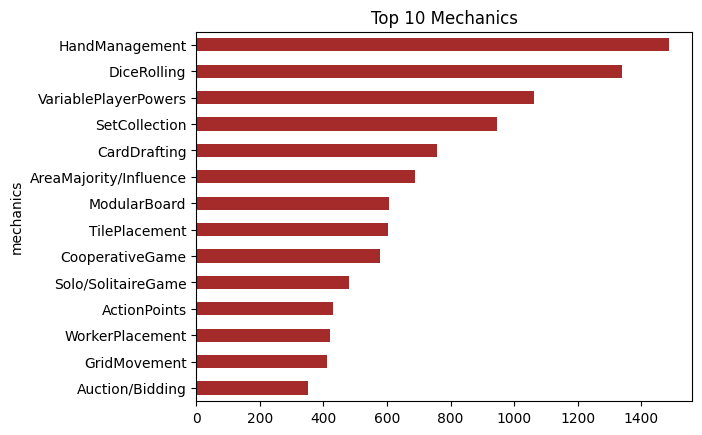

In [39]:
mechs_top.plot(kind='barh', color='brown', legend=None)
plt.gca().invert_yaxis()
plt.title('Top 10 Mechanics', fontsize=12)
plt.ylabel('mechanics')
plt.show()

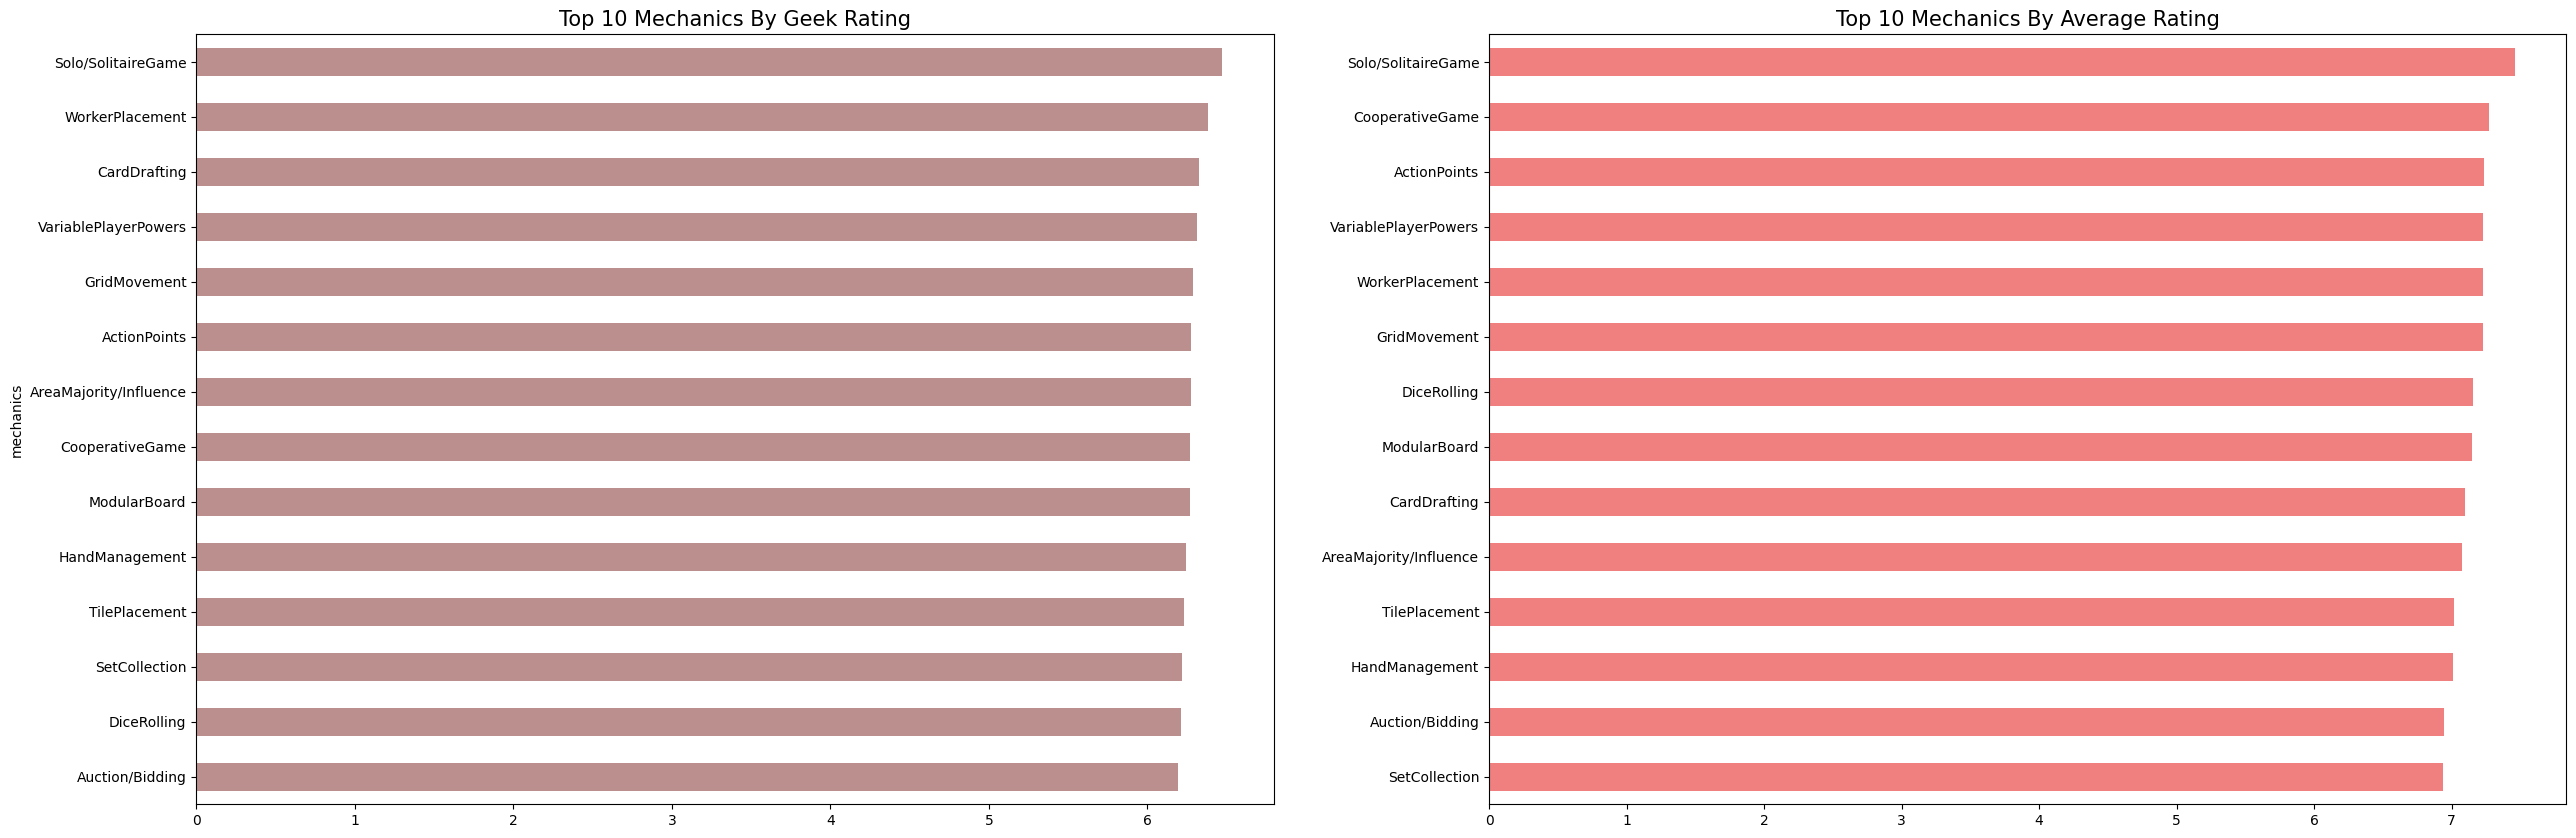

In [40]:
plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)
plt.subplots_adjust(right=2.1)
mechs_geek_rating['geek_rating'].plot(kind='barh', color='rosybrown')
plt.gca().invert_yaxis()
plt.title('Top 10 Mechanics By Geek Rating', fontsize=15)
plt.ylabel('mechanics')

plt.subplot(1,2,2)
mechs_avg_rating['avg_rating'].plot(kind='barh', color='lightcoral')
plt.gca().invert_yaxis()
plt.title('Top 10 Mechanics By Average Rating', fontsize=15)
plt.show()

1. `mechaic` ที่พบมากที่สุดคือ `Hand Management` และ `Dice Rolling`
1. `Solo / Solitaire Game`, `Worker Placement`, `Variable Player Powers` ได้คะแนนสูงจากทั้ง `geek_rating` และ `avg_raing`

**Designers and Artists**

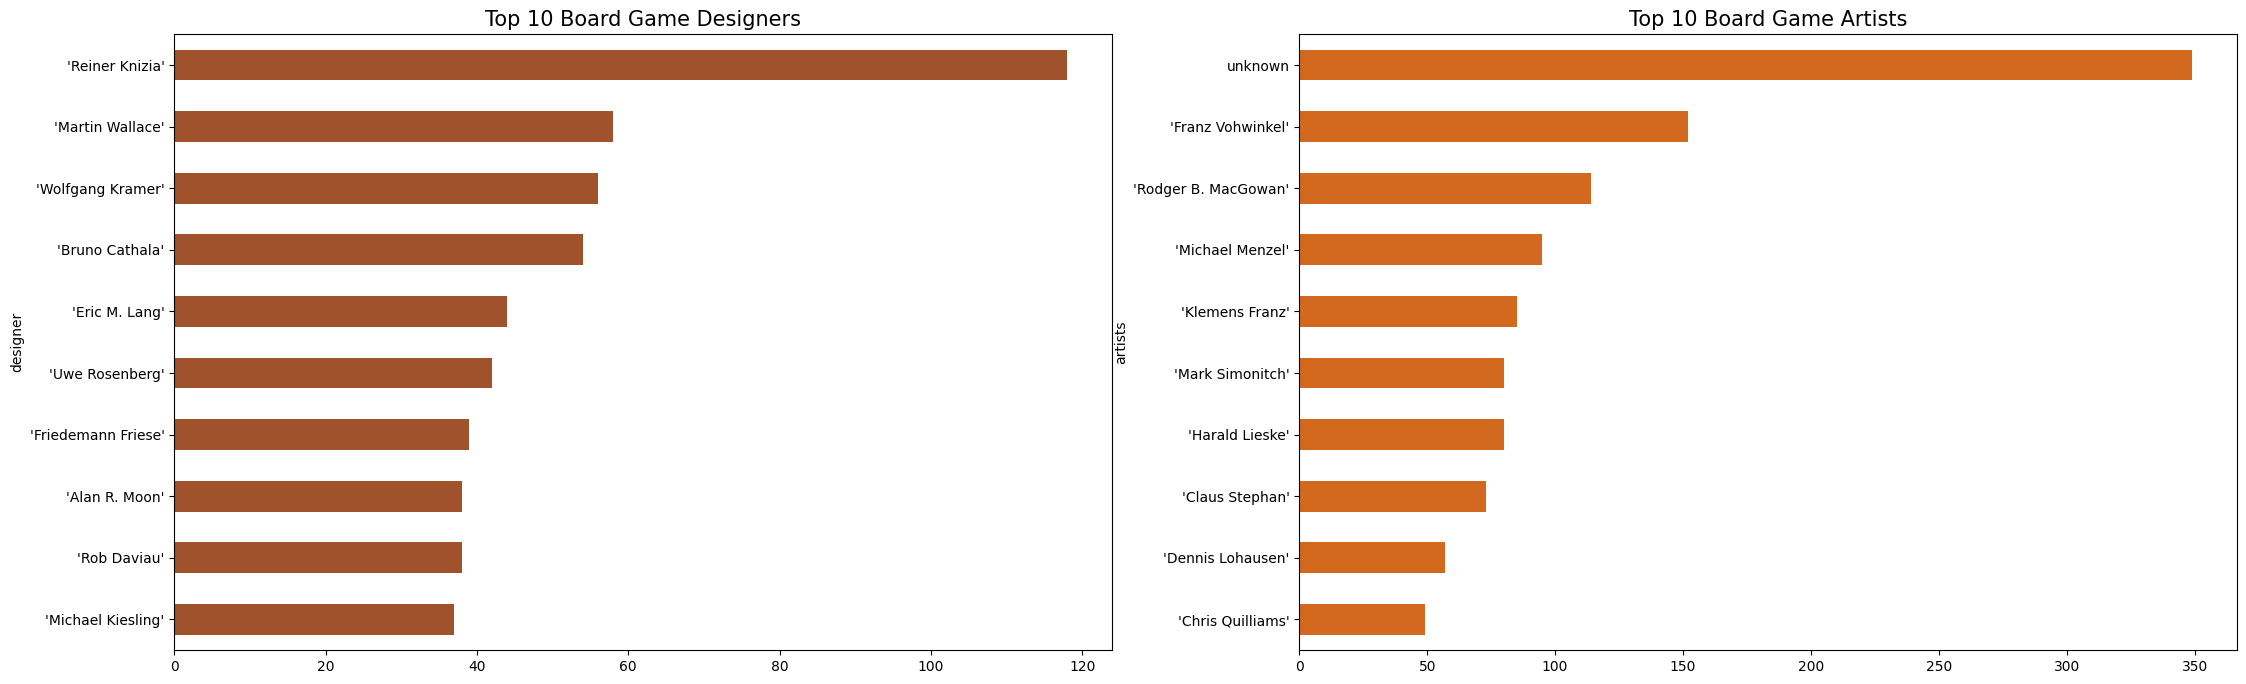

In [41]:
des_counts = df_bg_cat.explode('designer')
des_vc = des_counts.groupby('designer').size().sort_values(ascending=False)
des_vc = des_vc[des_vc > 35]

art_counts = df_bg_cat.explode('artist')
art_vc = art_counts.groupby('artist').size().sort_values(ascending=False)
art_vc = art_vc[art_vc > 47]

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.subplots_adjust(right=1.5)
des_vc.plot(kind='barh', color='sienna')
plt.gca().invert_yaxis()
plt.title('Top 10 Board Game Designers', fontsize=15)
plt.ylabel('designer')

plt.subplot(1,2,2)
art_vc.plot(kind='barh', color='chocolate')
plt.gca().invert_yaxis()
plt.title('Top 10 Board Game Artists', fontsize=15)
plt.ylabel('artists')
plt.show()

1. `designer` ที่ออกแบบเกมมากที่สุดคือ `Reiner Knizia`
1. `artist` ที่ออกแบบเกมมากที่สุดคือ `Franz Vohwinkel`
1. `artist` มี `unknown` จำนวนมาก เนื่องจากเกมเหล่านี้อาจเป็นเกมของการผลิตขนาดเล็ก

**Publisher**

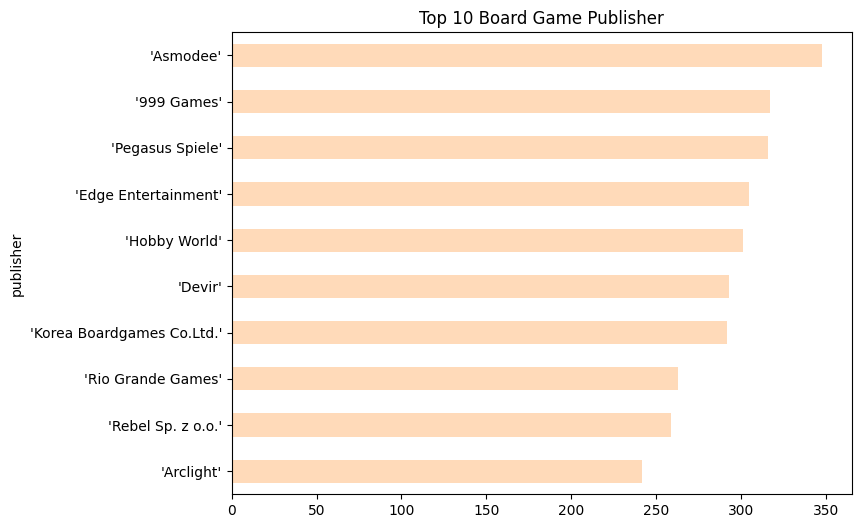

In [42]:
pub_counts = df_bg_cat.explode('publisher')
pub_vc = pub_counts.groupby('publisher').size().sort_values(ascending=False)
pub_vc = pub_vc[pub_vc > 240]

plt.figure(figsize=(8,6))
pub_vc.plot(kind='barh', color='peachpuff')
plt.gca().invert_yaxis()
plt.title('Top 10 Board Game Publisher', fontsize=12)
plt.ylabel('publisher')
plt.show()

`Asmodee` เผยแพร่เกมเป็นจำนวนมากที่สุด เนื่องจากเป็นหนึ่งในผู้เผยแพร่รายใหญ่ที่สุดและยังทำให้เกมกระดานหลายเกมเป็นแบบ digital ทำให้ชื่อเสียงของพวกเขาเพิ่มมากขึ้น

In [43]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x].str.split(',', expand=True), prefix='', prefix_sep='', drop_first = True).sum(level=0, axis=1)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

df_pub = df_bg[['name', 'publisher']].copy()
df_pub = df_pub.set_index('name')   

df_pub['publisher'] = df_pub['publisher'].str.strip('[]')
df_pub['publisher'] = df_pub['publisher'].str.replace(" ", '')

df_pub = dummies('publisher',df_pub)

# list of SiamBoardGames
siam_bg = list(df_pub[df_pub["'SiamBoardGames'"] == 1].index)
siam_bg[:10]

['Pandemic',
 '7 Wonders',
 'Ticket to Ride',
 'Terraforming Mars',
 '7 Wonders Duel',
 'Splendor',
 'Small World',
 'King of Tokyo',
 'Love Letter',
 'Power Grid']

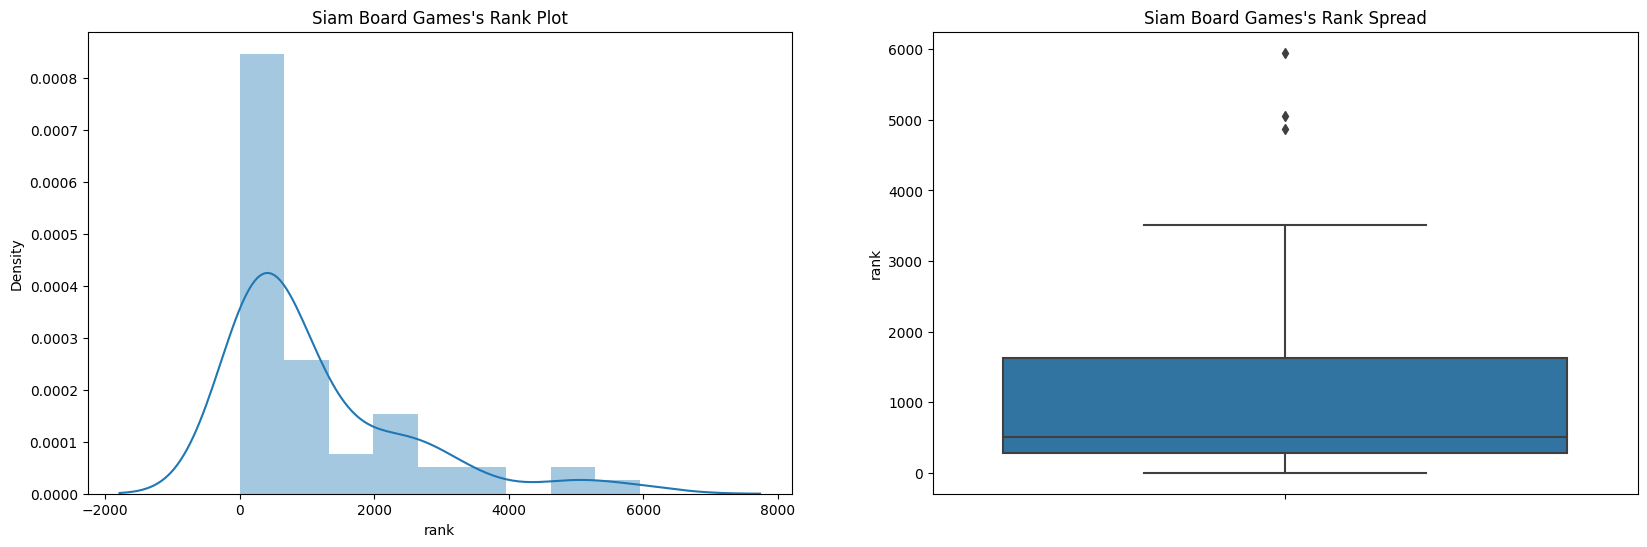

In [44]:
df_siam = df_bg[['name','rank']].copy()
df_siam = df_siam[df_siam['name'].isin(siam_bg)]

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title("Siam Board Games's Rank Plot")
sns.distplot(df_siam['rank'])

plt.subplot(1,2,2)
plt.title("Siam Board Games's Rank Spread")
sns.boxplot(y=df_siam['rank'])

plt.show()

เกมที่ `Siam Board Game` เป็นผู้เผยแพร่(มีการแปลและผลิตเป็นภาษาไทย) ส่วนใหญ่จะมี `rank` ไม่เกิน 2000

# Save clean data to CSV

In [45]:
# df_bg.to_csv('games-cleaned.csv', index=False)